In [70]:
from utils import * 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk

In [40]:
DATAPASS = '../../yelp10/dataset/review.json'
review = load_json_to_df(DATAPASS)

In [4]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,uYHaNptLzDLoV_JZ_MuzUA,0,2016-07-12,0,VfBHSwC5Vz_pbFluy07i9Q,5,My girlfriend and I stayed here for 3 nights a...,0,cjpdDjZyprfyDG3RlkVG3w
1,uYHaNptLzDLoV_JZ_MuzUA,0,2016-10-02,0,3zRpneRKDsOPq92tq7ybAA,3,If you need an inexpensive place to stay for a...,0,bjTcT8Ty4cJZhEOEo01FGA
2,uYHaNptLzDLoV_JZ_MuzUA,0,2015-09-17,0,ne5WhI1jUFOcRn-b-gAzHA,3,Mittlerweile gibt es in Edinburgh zwei Ableger...,0,AXgRULmWcME7J6Ix3I--ww
3,uYHaNptLzDLoV_JZ_MuzUA,0,2016-08-21,0,llmdwOgDReucVoWEry61Lw,4,Location is everything and this hotel has it! ...,0,oU2SSOmsp_A8JYI7Z2JJ5w
4,uYHaNptLzDLoV_JZ_MuzUA,0,2013-11-20,0,DuffS87NaSMDmIfluvT83g,5,gute lage im stadtzentrum. shoppingmeile und s...,0,0xtbPEna2Kei11vsU-U2Mw


In [9]:
user_group = review.groupby('user_id').count().sort_values(by ='review_id', ascending = False).reset_index()

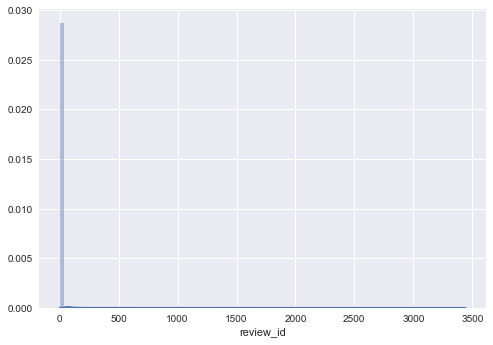

In [14]:
sns.distplot(user_group['review_id'], bins = 100)
plt.show()

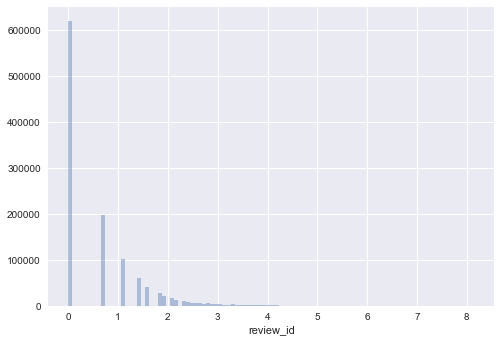

In [20]:
sns.distplot(np.log(user_group['review_id']), bins = 100, kde = False)
plt.show()

In [24]:
user_group.head(10)

,user_id,business_id,cool,date,funny,review_id,stars,text,useful
0,CxDOIDnH8gp9KXzpBHJYXw,3442,3442,3442,3442,3442,3442,3442,3442
1,bLbSNkLggFnqwNNzzq-Ijw,1952,1952,1952,1952,1952,1952,1952,1952
2,PKEzKWv_FktMm2mGPjwd0Q,1563,1563,1563,1563,1563,1563,1563,1563
3,DK57YibC5ShBmqQl97CKog,1381,1381,1381,1381,1381,1381,1381,1381
4,QJI9OSEn6ujRCtrX06vs1w,1318,1318,1318,1318,1318,1318,1318,1318
5,d_TBs6J3twMy9GChqUEXkg,1160,1160,1160,1160,1160,1160,1160,1160
6,ELcQDlf69kb-ihJfxZyL0A,1123,1123,1123,1123,1123,1123,1123,1123
7,UYcmGbelzRa0Q6JqzLoguw,1080,1080,1080,1080,1080,1080,1080,1080
8,U4INQZOPSUaj8hMjLlZ3KA,1067,1067,1067,1067,1067,1067,1067,1067
9,cMEtAiW60I5wE_vLfTxoJQ,1064,1064,1064,1064,1064,1064,1064,1064


In [26]:
user_group = user_group[['user_id', 'review_id']]

In [30]:
DATAPASS2 = '../../yelp10/dataset/user.json'
user = load_json_to_df(DATAPASS2)

In [32]:
top10 = user_group.head(10)

In [33]:
user10 = user.loc[user['user_id'].isin(top10['user_id'])]

In [42]:
target = pd.merge(top10, user10, on = 'user_id').iloc[2:4]

In [43]:
target_review = review.loc[review['user_id'].isin(target['user_id'])]

In [49]:
target_review.to_csv('sample_user_review.csv', index = False)

In [50]:
target.to_csv('sample_user_profile.csv', index = False)

In [51]:
target_review = pd.read_csv('sample_user_review.csv')

In [53]:
target_profile = pd.read_csv('sample_user_profile.csv')

## What kind of metric can we use to define 'writing style' ?

In [58]:
user1 = target_review[target_review['user_id'] == target_profile.iloc[0]['user_id']]

In [60]:
user2 = target_review[target_review['user_id'] == target_profile.iloc[1]['user_id']]

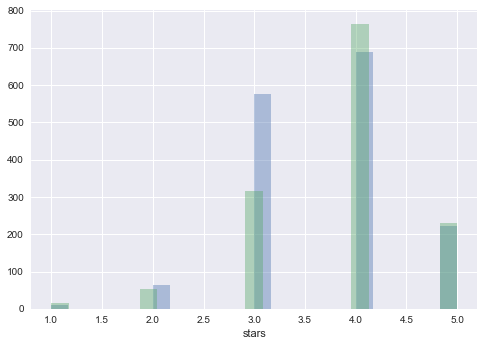

In [65]:
sns.distplot(user1['stars'], kde = False)
sns.distplot(user2['stars'], kde = False)
plt.show()

In [74]:
def sentence_length(s):
    return len(nltk.word_tokenize(s))

In [79]:
user1_len = user1['text'].apply(lambda x : sentence_length(x))

In [80]:
user2_len = user2['text'].apply(lambda x : sentence_length(x))

#### Word length

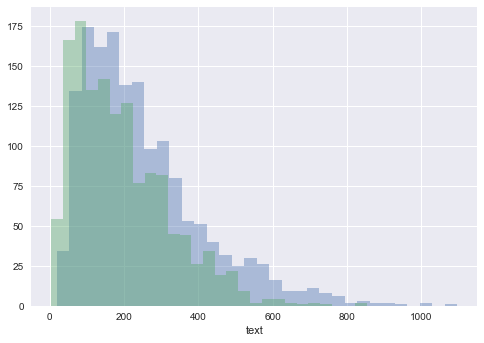

In [106]:
sns.distplot(user1_len, kde = False)
sns.distplot(user2_len, kde = False)
plt.show()

In [93]:
def extract_word_type(s):
    tagged = nltk.pos_tag(nltk.word_tokenize(s))
    proverb = len([item[0] for item in tagged if item[1][0] == 'P'])
    noun = len([item[0] for item in tagged if item[1][0] == 'N'])
    verb = len([item[0] for item in tagged if item[1][0] == 'V'])
    adjective = len([item[0] for item in tagged if item[1][0] == 'J'])
    return proverb, noun, verb, adjective

In [95]:
w_type1 = user1['text'].apply(lambda x : extract_word_type(x))

In [112]:
w_type2 = user2['text'].apply(lambda x : extract_word_type(x))

#### Proverbs

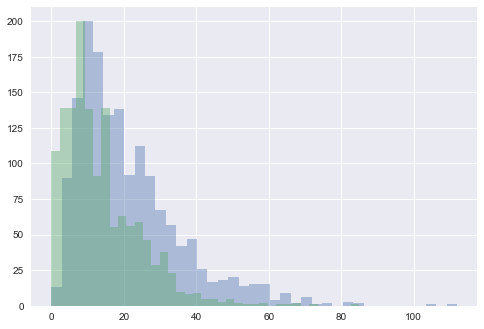

In [113]:
sns.distplot([i[0] for i in w_type1], kde = False)
sns.distplot([j[0] for j in w_type2], kde = False)
plt.show()

#### Nouns

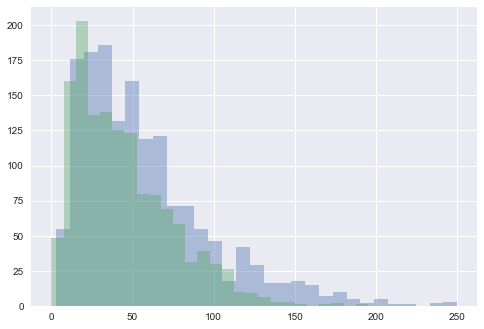

In [115]:
sns.distplot([i[1] for i in w_type1], kde = False)
sns.distplot([j[1] for j in w_type2], kde = False)
plt.show()

#### Verbs

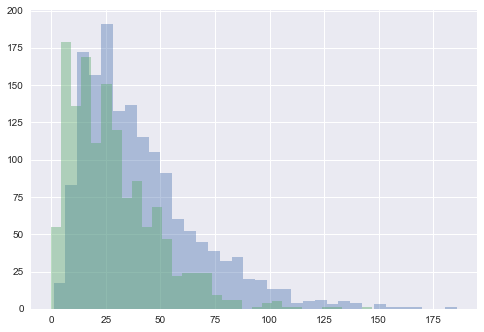

In [116]:
sns.distplot([i[2] for i in w_type1], kde = False)
sns.distplot([j[2] for j in w_type2], kde = False)
plt.show()

#### Adjective

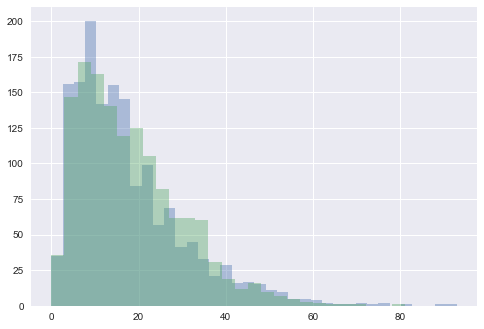

In [117]:
sns.distplot([i[3] for i in w_type1], kde = False)
sns.distplot([j[3] for j in w_type2], kde = False)
plt.show()

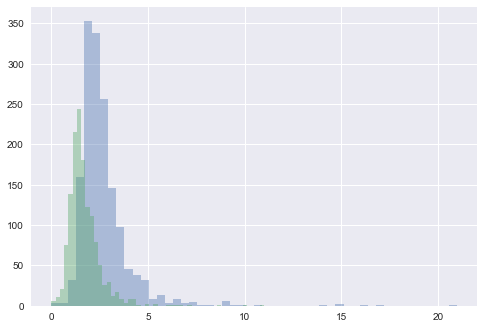

In [120]:
sns.distplot([0 if i[3] == 0 else i[2]/i[3] for i in w_type1], kde = False)
sns.distplot([0 if j[3] == 0 else j[2]/j[3] for j in w_type2], kde = False)
plt.show()